In [20]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [21]:
# path= 'data/liver/'
path="C:\\Workplace\\C++\\d2ome_v2\\v2\\v2\\bin\\Debug\\" 
filelist=os.listdir(path)
filelist.remove("compare.csv")
proteinlist= []
for p in filelist:
    if p.endswith(".csv") and "_compar" not in p and "_Compar" not in p:
        proteinlist.append(p)  

In [22]:
data=pd.DataFrame()
for  p in proteinlist: 
    d=pd.read_csv(os.path.join(path,p))
    d["Protein"]=p.replace('.csv','')    
    data=pd.concat([data,d])
print(data.shape)
print(data.columns)

(48009, 38)
Index(['proteinName', 'peptideSeq', 'charge', 'old_Rsquared', 'new_Rsquared',
       'NDP', 'rateconstant', 'sigma', 'Abundance', 'MassToCharge', 'RMSE',
       'selected_A1A0_count', ' selected_A2A0_count', ' selected_A2A1_count',
       'improved_timePoints', 'new_k', 'I0_percentatediffI0_percentatediff',
       'selected_io_t', 'i0', 'I0_asymptote', 'new_rmse', 'lowerci_old',
       'upperci_old', 'sigma_old', 'lowerci_new', 'upperci_new', 'sigma_new',
       'old_pearson', 'new_pearson', 'Protein', 'protien', 'peptide',
       'rsquared', 'mo', 'io_e', 'io_a1a0', 'io_a2a0', 'io_a2a1'],
      dtype='object')


In [23]:
data=data[data.NDP >=4]
data=data[data.old_Rsquared>0.95]
data=data.reset_index(drop=True)
print(data.shape)

# data=data[data.NDP >=6]
# data=data[data.old_Rsquared<0.25]
# data=data.reset_index(drop=True)
# print(data.shape)

(6795, 38)


In [24]:
data.head()

,proteinName,peptideSeq,charge,old_Rsquared,new_Rsquared,NDP,rateconstant,sigma,Abundance,MassToCharge,...,new_pearson,Protein,protien,peptide,rsquared,mo,io_e,io_a1a0,io_a2a0,io_a2a1
0,1433B_MOUSE,NLLSVAYK,2,0.953825,0.973210,12.0,0.16249,0.013771,1.432731e+09,454.26599,...,0.994301,1433B_MOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1433B_MOUSE,DSTLIMQLLR,2,0.985986,0.997529,12.0,0.19307,0.009791,1.747584e+09,595.33411,...,0.999524,1433B_MOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1433B_MOUSE,YLSEVASGENK,2,0.986787,0.996046,12.0,0.23813,0.011572,1.513652e+08,598.79327,...,0.998608,1433B_MOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1433B_MOUSE,YLILNATQAESK,2,0.979972,0.993527,12.0,0.26716,0.016474,1.711845e+08,675.86682,...,0.997318,1433B_MOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1433B_MOUSE,AVTEQGHELSNEER,3,0.984752,0.996204,12.0,0.25681,0.014046,3.332529e+07,533.58502,...,0.998252,1433B_MOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
selected=pd.DataFrame()
for p in data.proteinName.unique():
    d=pd.read_csv(os.path.join(path,"_compare"+p+".csv"))
    selected=pd.concat([selected,d])


print(selected.shape)
selected=selected.dropna()
print(selected.shape)

(144278, 15)
(141540, 15)


In [26]:
selected["Decoy_deviation"]=selected.exp_RIA_decoy-selected.theoRIA
selected.head(5)

,Protein,Peptide,charge,time,RSS,theta,min_rss_decoy,diff,abs_diff,perc_diff,abs_perc_diff,exp_RIA_decoy,theoRIA,min_kl,min_kl_decoy,Decoy_deviation
0,1433B_MOUSE,NLLSVAYK,2,0,0.000936,0.00,0.376617,0.000000,0.000000,0.000000,0.000000,0.109142,0.606359,-0.003070,1.109046,-0.497216
1,1433B_MOUSE,NLLSVAYK,2,1,0.000011,0.15,0.061413,-0.033410,0.033410,-0.064556,0.064556,0.336876,0.517534,-0.000789,0.143585,-0.180658
2,1433B_MOUSE,NLLSVAYK,2,2,0.000072,0.24,0.038979,-0.058956,0.058956,-0.126365,0.126365,0.361703,0.466553,0.001560,0.107810,-0.104849
3,1433B_MOUSE,NLLSVAYK,2,3,0.000276,0.40,0.000883,0.002829,0.002829,0.005776,0.005776,0.478532,0.489771,0.001444,0.000594,-0.011239
4,1433B_MOUSE,NLLSVAYK,2,9,0.000279,0.73,0.019340,-0.009702,0.009702,-0.024253,0.024253,0.336066,0.400021,0.001541,0.066709,-0.063955


In [27]:
merged=data.merge(selected,left_on=["proteinName","peptideSeq","charge"], right_on=["Protein","Peptide","charge"])[["Decoy_deviation","proteinName","peptideSeq","charge","time","theta","RSS","perc_diff","min_rss_decoy","abs_perc_diff"]]
# merged=merged.dropna()
merged.shape

(51785, 10)

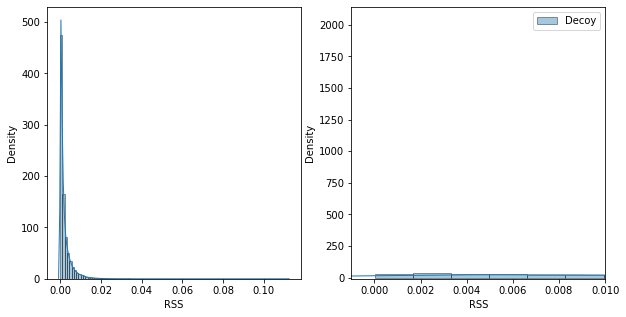

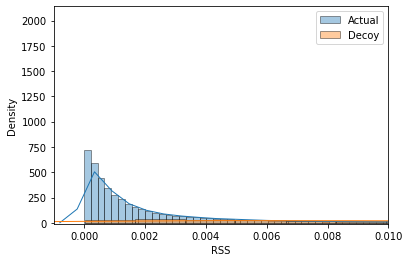

In [33]:
import math

plt.figure(figsize=(10,5))

plt.subplot(1,2,1) 
sns.distplot(merged[(merged.theta>0) ].RSS.astype(float) , 
              hist=True, kde=True, bins=100, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,"bw_adjust":0.6},label="Actual")

plt.subplot(1,2,2) 
sns.distplot(merged[(merged.theta>0) ].min_rss_decoy.astype(float) ,
             hist=True, kde=True, bins=500, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,"bw_adjust":0.6},label="Decoy")

 

plt.xlabel("RSS")
plt.xlim([-0.001,0.01])
plt.ylim([-10,2140])
plt.legend()

plt.show()

# ==============================================================
# ==============================================================
# ==============================================================

import math

sns.distplot(merged[(merged.theta>0) ].RSS.astype(float) , 
              hist=True, kde=True, bins=500, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,"bw_adjust":0.6},label="Actual")

plt.legend()

sns.distplot(merged[(merged.theta>0) ].min_rss_decoy.astype(float) ,
             hist=True, kde=True, bins=500, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,"bw_adjust":0.6},label="Decoy")

plt.xlabel("RSS")
plt.xlim([-0.001,0.01])
plt.ylim([-10,2140])
plt.legend()

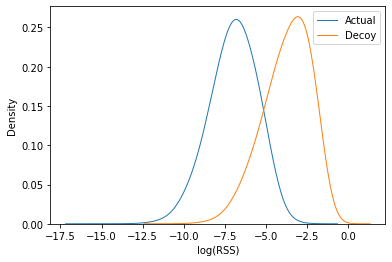

In [34]:
import math
sns.distplot([math.log(float(x)) for x in 
             merged[(merged.theta>0) ].RSS.astype(float) #(merged.abs_perc_diff<0.1)& 
             ], hist=False, kde=True,  
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1,"bw_adjust":3},label="Actual")


sns.distplot([math.log(float(x)) for x in 
             merged[ (merged.theta>0) ].min_rss_decoy.astype(float) #(merged.abs_perc_diff<0.1)&
             ], hist=False, kde=True, 
             bins=int(180/5),  
             hist_kws={'edgecolor':'black' },
             kde_kws={'linewidth': 1,"bw_adjust":3},label="Decoy")

plt.xlabel("log(RSS)")

plt.legend()

In [35]:
temp_merged=merged[(merged.theta>0) ].sort_values(by="RSS")

Text(0.5, 0, 'RSS')

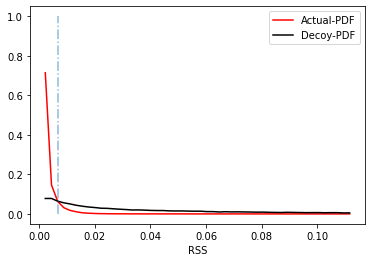

In [190]:

# initializing random values
data = temp_merged.RSS #np.random.randn(N)
  
# getting data of the histogram
count, bins_count = np.histogram(data, bins=50)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="Actual-PDF")
# plt.plot(bins_count[1:], cdf, label="Actual-CDF")
plt.legend()

# # ===================================================
# # ===================================================
# # ===================================================

# initializing random values
data = temp_merged.min_rss_decoy #np.random.randn(N)
  
# getting data of the histogram
count, bins_count = np.histogram(data, bins=bins_count)
  
# finding the PDF of the histogram using count values
pdf_decoy = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf_decoy = np.cumsum(pdf_decoy)
  
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf_decoy, color="k", label="Decoy-PDF")
# plt.plot(bins_count[1:], cdf, label="Actual-CDF")
plt.legend()

plt.vlines(x=6.69863939e-03,ymin=0,ymax=1,linestyle="-.",alpha=0.5)

plt.xlabel("RSS")

In [184]:

# th=2.23298390e-03

# decoy_test= temp_merged.min_rss_decoy 
# rss_test= temp_merged.RSS 

In [182]:
# import random
# from scipy import stats

# pvals=[]

# for i in range(100):
#     random_items_decoy = random.sample(list(decoy_test), 5000)
#     random_items_actual= random.sample(list(rss_test), 5000)
#     pvals.append (stats.ttest_ind(random_items_decoy,random_items_actual)[1])

#     import statsmodels.stats.multitest as mt
# mt.fdrcorrection(pvals,0.05)

In [183]:
# list(bins_count).index(0.006698639389303444)

In [158]:
# list(bins_count)

In [194]:
dn=0
for i in range(3,bins_count.shape[0]-1):
    dn+=1#pdf_decoy[i]
    

In [195]:
nn=0
for i in range(3,bins_count.shape[0]-1):
    nn += 1- (pdf[i]/(pdf[i]+ pdf_decoy[i]))

In [196]:
nn/dn

0.970847253740404

In [198]:
for start in range(0,bins_count.shape[0]-1):
    dn=0
    for i in range(start,bins_count.shape[0]-1):
        dn+=1#pdf_decoy[i]
        
    nn=0
    for i in range(start,bins_count.shape[0]-1):
        nn += 1- (pdf[i]/(pdf[i]+ pdf_decoy[i]))
        
    print(nn/dn)

0.9316162595536226
0.9486157960562566
0.9611178791442389
0.970847253740404
0.9779711758038718
0.9832336996619612
0.9873600125381522
0.9899961294190479
0.9919237600522474
0.9932484973632577
0.9941997837563681
0.9949014017431766
0.99544708908279
0.9957790927278335
0.996268785975827
0.9965274366272701
0.9969455787442805
0.9970217222854335
0.9972654676560265
0.9974968748561714
0.9977040342673754
0.997864724639024
0.9980935187574275
0.9983351466832543
0.9983289456547012
0.9984494717031397
0.9984493111337028
0.9985398866248024
0.9985566073283055
0.9986948546834232
0.9986295974175944
0.9985574709658888
0.9987034568340809
0.9986271895890269
0.9986806743113366
0.9985927192654257
0.9984921992129561
0.9983762145370296
0.998240899081782
0.9983520735368522
0.9981872808905374
0.9979858676561526
0.9981147324186601
0.9983187695822419
0.9980385645126155
0.9976462774151387
0.9979587531014608
0.9972783374686144
0.9959175062029215
0.991835012405843
